# Univariate Statistics

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectPercentile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./dataset/airbnb_cleaned.csv', encoding='Latin-1')

In [3]:
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce').fillna(0)
df['host_is_superhost'] = pd.to_numeric(df['host_is_superhost'], errors='coerce').fillna(0)

In [4]:
cleanup_proptype = {'Apartment': 1, 'House': 2, 'Townhouse': 3, 'Loft': 4, 'Condominium': 5, 'Serviced apartment': 6,  'Guest suite': 7, 'Other': 8,
                     'Bed and breakfast': 9, 'Bed & Breakfast': 9, 'Boutique hotel': 10, 'Resort': 11, 'Guesthouse': 12, 'Hostel': 13, 'Hotel': 14, 'Bungalow': 15,
                    'Villa': 16, 'Tiny house': 17, 'Aparthotel': 18, 'Boat': 19, 'Cottage': 20, 'Tent': 21, 'Camper/RV': 22, 'Cabin': 23, 'Casa particular (Cuba)': 24,
                   'Castle': 25, 'Houseboat': 26, 'Earth house': 27, 'Nature lodge': 28, 'Cave': 29, 'Train': 30, 'Timeshare': 31, 'Island': 32, 'Bus': 33, 'Chalet': 34
                   }
df['property_type'].replace(cleanup_proptype, inplace=True)

In [5]:
def LRfindAveragePrice(location):
    return (df[(df.neighbourhood_cleansed == location)])

area = LRfindAveragePrice('Allerton')
area.drop(['neighbourhood_cleansed'], axis=1)

,Unnamed: 0,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms,host_is_superhost,host_response_rate
555,591,182177,873273,10469.0,3,1.00,8,1.0,2.0,1.0,125.0,255,93.0,14,2,1.0,0.0,100.0
1271,1344,498120,2459648,10469.0,2,1.01,1,2.0,1.0,1.0,35.0,2,100.0,20,7,1.0,0.0,0.0
1754,1851,715270,3684360,10467.0,1,1.01,3,1.0,2.0,1.0,39.0,155,90.0,11,2,1.0,0.0,98.0
1858,1961,755528,3684360,10467.0,1,1.00,3,1.0,2.0,1.0,49.0,153,90.0,1,1,1.0,0.0,98.0
1870,1973,759901,873273,10469.0,2,1.01,2,1.0,1.0,1.0,85.0,37,94.0,20,5,1.5,0.0,100.0
1912,2016,773041,3684360,10467.0,1,1.01,3,1.0,2.0,1.0,38.0,139,88.0,3,1,1.0,0.0,98.0
5513,5694,3400359,16286162,10469.0,2,1.01,1,1.0,1.0,1.0,45.0,103,93.0,13,2,1.5,1.0,100.0
5550,5731,3429765,16286162,10469.0,2,1.01,1,1.0,1.0,1.0,45.0,75,96.0,0,2,1.0,1.0,100.0
7120,7319,4462008,16286162,10469.0,2,1.01,2,1.0,2.0,1.0,43.0,92,91.0,0,2,1.0,1.0,100.0
8238,8451,5046189,23732730,10469.0,2,1.00,4,0.0,3.0,1.0,200.0,44,96.0,30,30,1.0,1.0,100.0


In [6]:
df_features = area[['accommodates', 'beds', 'bedrooms', 'bathrooms', 'availability_30', 'minimum_nights', 'number_of_reviews', 'bed_type', 'host_response_rate', 'room_type', 'zipcode', 'property_type']]
df_target = area['price']

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(df_features), 15))

X_w_noise = np.hstack([df_features, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, df_target, random_state=0, test_size=.3)

select = SelectPercentile(percentile=30)

#Train the selector
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print('X_train.columns is: {}'.format(X_train.shape[1]))
print('X_train_selected.columns is: {}'.format(X_train_selected.shape[1]))

X_train.columns is: 27
X_train_selected.columns is: 8


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [7] are constant.
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 555 to 147153
Data columns (total 12 columns):
accommodates          98 non-null int64
beds                  98 non-null float64
bedrooms              98 non-null float64
bathrooms             98 non-null float64
availability_30       98 non-null int64
minimum_nights        98 non-null int64
number_of_reviews     98 non-null int64
bed_type              98 non-null float64
host_response_rate    98 non-null float64
room_type             98 non-null float64
zipcode               98 non-null float64
property_type         98 non-null int64
dtypes: float64(7), int64(5)
memory usage: 10.0 KB
[ True False  True  True  True  True  True False False  True  True False
 False False False False False False False False False False False False
 False False False]


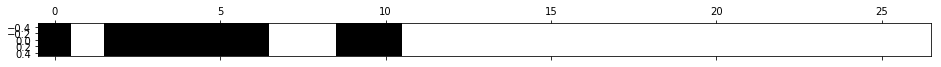

In [19]:
df_features.info()
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [22]:
import statsmodels.api as sm

df_features = area[['accommodates', 'bedrooms', 'bathrooms', 'availability_30', 'minimum_nights', 'number_of_reviews', 'room_type', 'zipcode']]
df_predictors = sm.add_constant(df_features)
est = sm.OLS(df_target, 
            df_features).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 17 May 2019   Prob (F-statistic):           6.17e-42
Time:                        01:02:43   Log-Likelihood:                -483.99
No. Observations:                  98   AIC:                             984.0
Df Residuals:                      90   BIC:                             1005.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
accommodates         18.5964      2.74

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
X_test_selected = select.transform(X_test)
linreg = LinearRegression()

linreg.fit(X_train_selected, y_train)
print('The score of Linear Regression on the selected features: {:.3f}'.format(linreg.score(X_test_selected, y_test)))

The score of Linear Regression on the selected features: 0.634
